# NumPy Fundamentals

## 1.1 What is NumPy?
- Core library for numerical computing in Python
- Provides high-performance multidimensional array object
- Contains tools for:
  - Linear algebra
  - Fourier transforms
  - Random number generation

## 1.2 Key Advantages
- **50x faster** than Python lists for vector operations
- Memory-efficient contiguous storage
- Vectorized operations (eliminates loops)
- Foundation for Pandas, SciPy, Matplotlib

In [135]:
import numpy as np
print("NumPy version:", np.__version__)

# Memory comparison example
import sys
py_list = list(range(1000))
np_array = np.arange(1000)

print("Python list size:", sys.getsizeof(py_list), "bytes")
print("NumPy array size:", np_array.nbytes, "bytes")

NumPy version: 1.23.5
Python list size: 8056 bytes
NumPy array size: 4000 bytes


## 2.1 Creating Arrays

### Methods:
1. From Python sequences: `np.array()`
2. Initial placeholders:
   - `np.zeros()` - Array of 0s
   - `np.ones()` - Array of 1s
   - `np.empty()` - Uninitialized array
3. Ranges:
   - `np.arange()` - Similar to range()
   - `np.linspace()` - Evenly spaced numbers

### Key Properties:
- Fixed size at creation
- Homogeneous data type
- Shape defined as (rows, columns)

In [137]:
# From Python list
arr1 = np.array([1, 2, 3, 4])
print("1D Array:", arr1)

# Special arrays
zeros = np.zeros((2,3))
print("\nZeros array:\n", zeros)

ones = np.ones((3,2))
print("\nOnes array:\n", ones)

# Ranges
range_arr = np.arange(0, 10, 2)  # start, stop, step
print("\nRange array:", range_arr)

linear = np.linspace(0, 1, 5)    # start, stop, num_points
print("\nLinear spaced:", linear)

1D Array: [1 2 3 4]

Zeros array:
 [[0. 0. 0.]
 [0. 0. 0.]]

Ones array:
 [[1. 1.]
 [1. 1.]
 [1. 1.]]

Range array: [0 2 4 6 8]

Linear spaced: [0.   0.25 0.5  0.75 1.  ]


## 3.1 Array Attributes

### Essential Attributes:
- `ndim`: Number of dimensions
- `shape`: Tuple of array dimensions
- `size`: Total number of elements
- `dtype`: Data type of elements
- `itemsize`: Bytes per element
- `nbytes`: Total memory used

### Memory Layout:
- Contiguous block of memory
- Fixed-type storage (unlike Python lists)

In [139]:
arr = np.random.randint(10, size=(3,4))

print("Array:\n", arr)
print("\nDimensions:", arr.ndim)
print("Shape (rows, cols):", arr.shape)
print("Total elements:", arr.size)
print("Data type:", arr.dtype)
print("Bytes per element:", arr.itemsize)
print("Total memory used:", arr.nbytes, "bytes")

# Type conversion
float_arr = arr.astype('float32')
print("\nAfter type conversion:", float_arr.dtype)

Array:
 [[2 9 1 5]
 [3 8 2 4]
 [6 7 5 4]]

Dimensions: 2
Shape (rows, cols): (3, 4)
Total elements: 12
Data type: int32
Bytes per element: 4
Total memory used: 48 bytes

After type conversion: float32


## 4.1 Array Indexing

### Basic Rules:
- Zero-based indexing
- Negative indices count from end
- Multidimensional: `arr[row,col]`

### Slicing Syntax:
`array[start:stop:step]`

### Important Notes:
- Slices return **views** (not copies)
- Use `copy()` for explicit duplication

In [141]:
arr = np.arange(10, 20)
print("Original array:", arr)

# Basic indexing
print("Element at index 3:", arr[3])
print("Last element:", arr[-1])

# Slicing
print("\nElements 3-7:", arr[3:7])
print("Every other element:", arr[::2])

# 2D array example
arr2d = np.array([[1,2,3],[4,5,6],[7,8,9]])
print("\n2D array:\n", arr2d)
print("First row:", arr2d[0])
print("Last column:", arr2d[:,-1])
print("Subarray:\n", arr2d[1:, :2])

Original array: [10 11 12 13 14 15 16 17 18 19]
Element at index 3: 13
Last element: 19

Elements 3-7: [13 14 15 16]
Every other element: [10 12 14 16 18]

2D array:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
First row: [1 2 3]
Last column: [3 6 9]
Subarray:
 [[4 5]
 [7 8]]


## 5.1 Vectorized Operations

### Key Features:
- Operations applied element-wise
- No explicit loops needed
- Supports broadcasting

### Operation Types:
1. Arithmetic: `+`, `-`, `*`, `/`, `**`
2. Comparison: `>`, `<`, `==`
3. Mathematical functions: `np.sin()`, `np.log()`

## 5.2 Broadcasting Rules
1. Arrays must have compatible shapes
2. Dimensions are compared from right to left
3. Two dimensions are compatible when:
   - They are equal, or
   - One of them is 1

In [143]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

# Arithmetic operations
print("Addition:", a + b)
print("Multiplication:", a * 2)
print("Exponentiation:", a ** 2)

# Comparison
print("\nGreater than:", a > 2)
print("Equal to:", a == b)

# Broadcasting
c = np.array([[1], [2], [3]])
print("\nBroadcasting example:\n", c + a)

# Mathematical functions
print("\nSquare roots:", np.sqrt(a))
print("Exponentials:", np.exp(a))

Addition: [5 7 9]
Multiplication: [2 4 6]
Exponentiation: [1 4 9]

Greater than: [False False  True]
Equal to: [False False False]

Broadcasting example:
 [[2 3 4]
 [3 4 5]
 [4 5 6]]

Square roots: [1.         1.41421356 1.73205081]
Exponentials: [ 2.71828183  7.3890561  20.08553692]


## 6.1 Reshaping Arrays

### Key Methods:
- `reshape()`: Returns view with new shape
- `flatten()`: Returns 1D copy
- `ravel()`: Returns 1D view
- `transpose()`: Swaps dimensions

### Important Rules:
- Total size must remain unchanged
- Reshape order: 'C' (row-major) or 'F' (column-major)

## 6.2 Combining Arrays

### Methods:
- `np.concatenate()`: Join along existing axis
- `np.vstack()`: Vertical stacking (row-wise)
- `np.hstack()`: Horizontal stacking (column-wise)
- `np.stack()`: New axis stacking

In [145]:
# Reshaping examples
arr = np.arange(12)
print("Original array:", arr)

reshaped = arr.reshape(3, 4)
print("\nReshaped (3x4):\n", reshaped)

# Flatten vs ravel
flattened = reshaped.flatten()
raveled = reshaped.ravel()
print("\nFlattened (copy):", flattened)
print("Raveled (view):", raveled)

# Combining arrays
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7, 8]])

print("\nVertical stack:\n", np.vstack((a, b)))
print("\nHorizontal stack:\n", np.hstack((a, b)))
print("\nConcatenate along axis 0:\n", np.concatenate((a, b), axis=0))

Original array: [ 0  1  2  3  4  5  6  7  8  9 10 11]

Reshaped (3x4):
 [[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]

Flattened (copy): [ 0  1  2  3  4  5  6  7  8  9 10 11]
Raveled (view): [ 0  1  2  3  4  5  6  7  8  9 10 11]

Vertical stack:
 [[1 2]
 [3 4]
 [5 6]
 [7 8]]

Horizontal stack:
 [[1 2 5 6]
 [3 4 7 8]]

Concatenate along axis 0:
 [[1 2]
 [3 4]
 [5 6]
 [7 8]]


## 7.1 Statistical Operations

### Basic Aggregations:
- `sum()`/`np.sum()`: Sum of elements
- `mean()`/`np.mean()`: Arithmetic average
- `std()`/`np.std()`: Standard deviation
- `min()`/`max()`: Minimum/maximum values

### Additional Methods:
- `argmin()`/`argmax()`: Index of min/max
- `cumsum()`: Cumulative sum
- `cumprod()`: Cumulative product

### Axis Parameter:
- `axis=0`: Column-wise operation
- `axis=1`: Row-wise operation
- `axis=None`: All elements

In [147]:
arr = np.random.randint(0, 10, size=(3, 4))
print("Array:\n", arr)

print("\nGlobal sum:", np.sum(arr))
print("Column sums:", np.sum(arr, axis=0))
print("Row means:", np.mean(arr, axis=1))

print("\nMax value:", arr.max())
print("Index of min:", arr.argmin())

# Cumulative operations
print("\nCumulative sum:\n", np.cumsum(arr, axis=1))
print("\nCumulative product:\n", np.cumprod(arr, axis=0))

Array:
 [[4 0 2 1]
 [0 6 1 9]
 [7 6 4 2]]

Global sum: 42
Column sums: [11 12  7 12]
Row means: [1.75 4.   4.75]

Max value: 9
Index of min: 1

Cumulative sum:
 [[ 4  4  6  7]
 [ 0  6  7 16]
 [ 7 13 17 19]]

Cumulative product:
 [[ 4  0  2  1]
 [ 0  0  2  9]
 [ 0  0  8 18]]


## 8.1 Broadcasting Rules

### Three Rules:
1. Shape Alignment: Trailing dimensions matched
2. Compatibility: Dimensions equal or one is 1
3. Operation: Applied element-wise

### Common Cases:
- Array + Scalar
- Array (n,) + Array (n,1)
- Array (m,n) + Array (1,n)

### Limitations:
- Does not actually expand memory
- Fails when shapes are incompatible

In [149]:
# Array + scalar
arr = np.array([[1, 2, 3], [4, 5, 6]])
print("Array + 5:\n", arr + 5)

# Vector + column vector
vector = np.array([10, 20, 30])
col_vector = vector.reshape(3, 1)
print("\nVector:\n", vector)
print("\nColumn vector:\n", col_vector)
print("\nBroadcasted addition:\n", vector + col_vector)

# Incompatible shapes example
try:
    np.array([1, 2]) + np.array([[1, 2, 3]])
except ValueError as e:
    print("\nError:", e)

Array + 5:
 [[ 6  7  8]
 [ 9 10 11]]

Vector:
 [10 20 30]

Column vector:
 [[10]
 [20]
 [30]]

Broadcasted addition:
 [[20 30 40]
 [30 40 50]
 [40 50 60]]

Error: operands could not be broadcast together with shapes (2,) (1,3) 


## 9.1 Basic Linear Algebra

### Core Operations:
- `np.dot()`: Dot product/matrix multiplication
- `@` operator: Matrix multiplication (Python 3.5+)
- `np.linalg.inv()`: Matrix inverse
- `np.linalg.det()`: Determinant
- `np.linalg.solve()`: Solve linear equations

### Special Matrices:
- Identity: `np.eye()`
- Diagonal: `np.diag()`
- Triangular: `np.triu()`, `np.tril()`

In [151]:
# Matrix multiplication
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])

print("Matrix multiplication (@):\n", A @ B)
print("\ndot product equivalent:\n", np.dot(A, B))

# Matrix properties
print("\nDeterminant:", np.linalg.det(A))
print("Inverse:\n", np.linalg.inv(A))

# Solving equations
# 2x + y = 5
# x + 3y = 10
coeff = np.array([[2, 1], [1, 3]])
const = np.array([5, 10]) 
solution = np.linalg.solve(coeff, const)
print("\nSolution:", solution)

Matrix multiplication (@):
 [[19 22]
 [43 50]]

dot product equivalent:
 [[19 22]
 [43 50]]

Determinant: -2.0000000000000004
Inverse:
 [[-2.   1. ]
 [ 1.5 -0.5]]

Solution: [1. 3.]


## 10.1 Random Module

### Key Functions:
- `np.random.rand()`: Uniform [0,1)
- `np.random.randn()`: Standard normal
- `np.random.randint()`: Random integers
- `np.random.choice()`: Random selection
- `np.random.shuffle()`: In-place shuffling

### Distributions:
- Uniform: `random()`
- Normal: `normal()`
- Binomial: `binomial()`
- Poisson: `poisson()`

### Seed for Reproducibility:
`np.random.seed()` sets the random seed`

In [153]:
# Set seed for reproducibility
np.random.seed(42)

# Basic random numbers
print("Random float [0,1):", np.random.rand())
print("Random integers:", np.random.randint(0, 10, size=5))

# Distributions
normal = np.random.normal(loc=0, scale=1, size=1000)
uniform = np.random.uniform(low=0, high=10, size=1000)

# Random choice
colors = ['red', 'green', 'blue']
print("\nRandom choice:", np.random.choice(colors, size=5))

# Shuffling
arr = np.arange(10)
np.random.shuffle(arr)
print("\nShuffled array:", arr)

Random float [0,1): 0.3745401188473625
Random integers: [7 4 6 9 2]

Random choice: ['blue' 'blue' 'red' 'red' 'blue']

Shuffled array: [3 2 7 4 6 1 0 8 9 5]


## 11.1 Boolean Indexing

### Key Concepts:
- Select elements using logical conditions
- Returns a **copy** not a view
- Can combine multiple conditions with:
  - `&` (AND)
  - `|` (OR)
  - `~` (NOT)

## 11.2 Fancy Indexing
- Indexing with integer arrays
- Returns a **copy** not a view
- Can be used for:
  - Reordering elements
  - Selecting specific indices
  - Multi-dimensional selection

In [155]:
# Boolean indexing
arr = np.arange(1, 13).reshape(3, 4)
print("Original array:\n", arr)

# Simple condition
print("\nElements > 5:\n", arr[arr > 5])

# Multiple conditions
condition = (arr > 3) & (arr % 2 == 0)
print("\nElements > 3 AND even:\n", arr[condition])

# Fancy indexing
rows = np.array([0, 2])
cols = np.array([1, 3])
print("\nSelected elements:\n", arr[rows, cols])

# Reordering
order = np.array([2, 1, 0])
print("\nReordered rows:\n", arr[order])

Original array:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]

Elements > 5:
 [ 6  7  8  9 10 11 12]

Elements > 3 AND even:
 [ 4  6  8 10 12]

Selected elements:
 [ 2 12]

Reordered rows:
 [[ 9 10 11 12]
 [ 5  6  7  8]
 [ 1  2  3  4]]


## 12.1 File Operations

### Text Files:
- `np.loadtxt()`: Load from text file
- `np.savetxt()`: Save to text file

### Binary Files:
- `np.save()`: Save as .npy binary
- `np.load()`: Load .npy file
- `np.savez()`: Save multiple arrays as .npz

### CSV Files:
- Best handled with Pandas
- Can use `np.genfromtxt()` for basic CSV

In [162]:
# Text files
data = np.array([[1.2, 3.4], [5.6, 7.8]])
np.savetxt(r'data/data.txt', data, fmt='%.2f')
loaded = np.loadtxt(r'data/data.txt')
print("Loaded from text file:\n", loaded)

# Binary files
np.save(r'data/data.npy', data)
binary_loaded = np.load(r'data/data.npy')
print("\nLoaded from binary file:\n", binary_loaded)

# Multiple arrays
arr1 = np.arange(5)
arr2 = np.random.rand(3,3)
np.savez(r'data/multi.npz', a=arr1, b=arr2)
with np.load(r'data/multi.npz') as data:
    print("\nArray 1:", data['a'])
    print("Array 2:\n", data['b'])

Loaded from text file:
 [[1.2 3.4]
 [5.6 7.8]]

Loaded from binary file:
 [[1.2 3.4]
 [5.6 7.8]]

Array 1: [0 1 2 3 4]
Array 2:
 [[0.59086744 0.53700749 0.854136  ]
 [0.04949685 0.83331707 0.84392461]
 [0.28490802 0.46285196 0.43853849]]


## 13.1 Optimization Techniques

### Key Strategies:
1. **Vectorization**: Replace loops with array operations
2. **Pre-allocation**: Initialize arrays before filling
3. **In-place operations**: Use `+=`, `*=`, etc.
4. **Avoid copies**: Use views when possible

### Useful Functions:
- `np.einsum()`: Einstein summation
- `np.apply_along_axis()`: Apply function along axis
- `np.vectorize()`: Vectorize Python functions

In [165]:
# Vectorization example
size = 1000000

# Slow Python loop
def slow_add(a, b):
    result = np.empty_like(a)
    for i in range(len(a)):
        result[i] = a[i] + b[i]
    return result

# Fast vectorized operation
a = np.random.rand(size)
b = np.random.rand(size)

%timeit slow_add(a, b)  # ~300ms
%timeit a + b           # ~1ms

# In-place operations
arr = np.ones(10)
print("\nBefore:", arr)
arr *= 5  # In-place
print("After:", arr)

# Einsum example
A = np.random.rand(3,3)
B = np.random.rand(3,3)
print("\nMatrix multiplication with einsum:\n", np.einsum('ij,jk->ik', A, B))

331 ms ± 53.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.27 ms ± 414 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

Before: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
After: [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.]

Matrix multiplication with einsum:
 [[0.7362078  0.55535178 1.13045634]
 [0.51559596 0.41785205 0.85222665]
 [1.14930171 1.00565561 1.86569316]]


## 14.1 NumPy ↔ Pandas Conversion

### Conversion Methods:
- `df.values`: Get NumPy array (view)
- `df.to_numpy()`: Get NumPy array (copy)
- `pd.DataFrame(arr)`: Create DataFrame from array

### Best Practices:
- Handle missing data (NaN → None)
- Preserve dtypes during conversion
- Use `.loc[]` for Pandas-style indexing

In [167]:
import pandas as pd

# DataFrame to NumPy
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4.5, 5.5, 6.5]})
arr = df.to_numpy()
print("DataFrame to array:\n", arr)

# NumPy to DataFrame
new_arr = np.random.rand(3, 2)
new_df = pd.DataFrame(new_arr, columns=['X', 'Y'])
print("\nArray to DataFrame:\n", new_df)

# Handling missing data
arr_with_nan = np.array([1, 2, np.nan, 4])
df_nan = pd.DataFrame(arr_with_nan, columns=['Values'])
print("\nWith missing values:\n", df_nan)

DataFrame to array:
 [[1.  4.5]
 [2.  5.5]
 [3.  6.5]]

Array to DataFrame:
           X         Y
0  0.054139  0.310401
1  0.439734  0.134913
2  0.412797  0.345131

With missing values:
    Values
0     1.0
1     2.0
2     NaN
3     4.0


## 15.1 Images as NumPy Arrays

### Key Concepts:
- Images are 3D arrays (height × width × channels)
- Grayscale: 2D array
- RGB: 3D array (last dim = 3)
- Common operations:
  - Cropping
  - Color channel manipulation
  - Filtering
  - Normalization

Image shape: (630, 1200, 3)


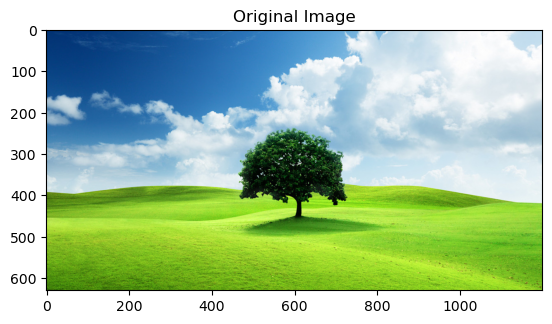

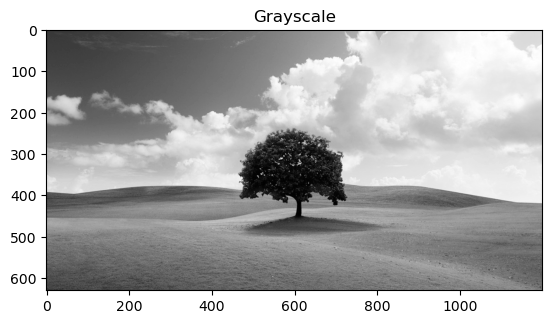

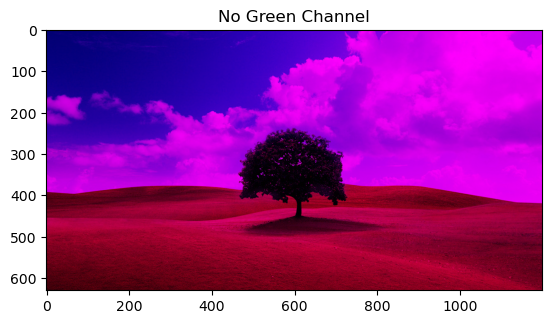

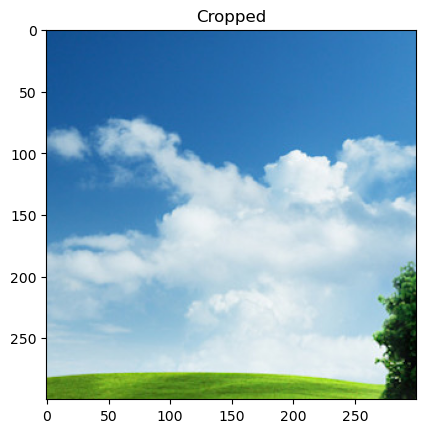

In [169]:
from matplotlib import image as mpimg
import matplotlib.pyplot as plt

# Load image
img = mpimg.imread(r'data/example.jpg')  # Replace with your image
print("Image shape:", img.shape)

# Display original
plt.imshow(img)
plt.title("Original Image")
plt.show()

# Grayscale conversion
gray = np.mean(img, axis=2)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.show()

# Color channel manipulation
modified = img.copy()
modified[:, :, 1] = 0  # Remove green channel
plt.imshow(modified)
plt.title("No Green Channel")
plt.show()

# Cropping
cropped = img[100:400, 200:500]
plt.imshow(cropped)
plt.title("Cropped")
plt.show()